In [1]:
import numpy as np
import pdf2image
import os
import cv2
import pytesseract
from tqdm import tqdm
from pdf_segmentation import *


# Enable autoreload
%load_ext autoreload

In [2]:
filepath = 'testfiles/test.pdf'

## To Pages

In [3]:
# Separate the diferent pdf pages into pil images
pil_pages = pdf2image.convert_from_path(filepath)

In [4]:
# Convert to opencv images
page_imgs = [cv2.cvtColor(np.asarray(p), cv2.COLOR_RGB2BGR) for p in pil_pages]

In [5]:
#for page in tqdm(page_imgs):

page = page_imgs[4]

img = page

In [6]:
bboxes = segment_page(img)

/home/mcpeixoto/Desktop/pdf2latex-converter/pdf_segmentation.py:79: RuntimeWarning: invalid value encountered in scalar divide
  if (img_section == 255).sum() / (img_section.shape[0] * img_section.shape[1]) > percentage_threshold:


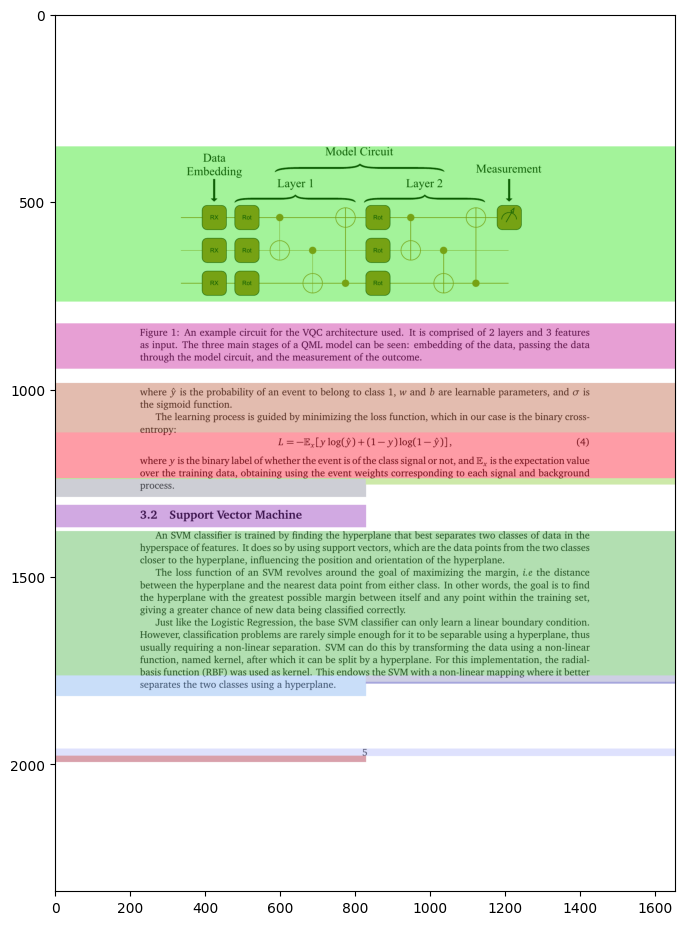

In [7]:
plot_all_boxes(page, bboxes)


In [9]:
def get_image_section(block, img):
    x1, y1, x2, y2 = block.x, block.y, block.x + block.width, block.y + block.height
    return img[y1:y2, x1:x2]

In [10]:
from latex_generation import generate_latex

In [11]:
from latex_generation import generate_latex
for i, block in enumerate(bboxes):
    img_block = get_image_section(block, page)
    output = generate_latex(img_block)

    if output[1] is not None:
        print(f"> Block {i}")
        print(f"> Block type: {output[0]}")
        print(f"> Block content: \n{output[1]}")
        print("-"*50)


> Block 1
> Block type: text
> Block content: 
    Figure 1: An example circuit for the VQC architecture used. It is comprised of 2 layers and 3 features  as input. The three main stages of a QML model can be seen: embedding of the data, passing the data  through the model circuit, and the measurement of the outcome.
--------------------------------------------------
> Block 2
> Block type: text
> Block content: 
    where ¥ is the probability of an event to belong to class 1, w and b are learnable parameters, and o is  the sigmoid function.   The learning process is guided by minimizing the loss function, which in our case is the binary cross-  entropy:    . m™ P14. fAN. fa NW fa ANY aN
--------------------------------------------------
> Block 3
> Block type: text
> Block content: 
    L=—E,Ly log(¥) + (1— y)log(1— 9], (4)    where y is the binary label of whether the event is of the class signal or not, and E,, is the expectation value  over the training data, obtaining using the ev